<h1>Problem Set 3</h1>

The libraries are imported.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

The following code can be used for integrating complex-valued functions.

In [8]:
def complex_quadrature(func, a, b, **kwargs):
    import scipy.integrate
    
    def real_func(x):
        return np.real(func(x))
    def imag_func(x):
        return np.imag(func(x))
    real_integral = scipy.integrate.quad(real_func, a, b, **kwargs)
    imag_integral = scipy.integrate.quad(imag_func, a, b, **kwargs)
    return real_integral[0] + 1j*imag_integral[0]

<h2>Problems 2</h2>

The constants are first defined in atomic units.

In [9]:
HBAR = 1
M = 1
A = 2
L = 10
K = 10

The state to be expanded is defined.

In [10]:
x, n  = symbols('x, n')
psi = (A**2 / pi)**(1/4) * exp(-A**2 * (x-L/2)**2 / 2 + 1j*K*x) 
phi = sqrt(2/L) * sin(n * pi * x / L)

The initial wavefunction is plotted with two basis states.

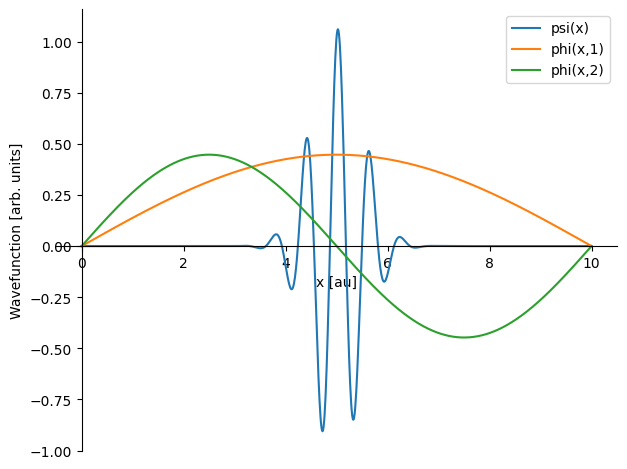

In [11]:
p=plot(re(psi), phi.subs(n,1), phi.subs(n,2), (x,0,L), legend=True, show=False,xlabel='x [au]',ylabel='Wavefunction [arb. units]')
p[0].label="psi(x)"
p[1].label="phi(x,1)"
p[2].label="phi(x,2)"
p.show()

In [12]:
NSTATES = 50 # number of basis states in the expansion

c = np.zeros(NSTATES+1, dtype=np.cdouble) # (complex) zero array in NumPy format to store the overlaps with the basis functions

for i in range(1,NSTATES+1):
    integrand = lambdify(x,psi*phi.subs(n,i)) # convert SymPy expression into a Python function
    c[i]=complex_quadrature(integrand,0,L) # overlap of psi and phi_n
c=Array(c) # convert the NumPy array of expansion coefficients into a SymPy array

(Code can be added here to expand the initial wavefunction in terms of the particle-in-a-box basis states and propagate the result as in the previous problem set.)

In [13]:
En = pi**2 * HBAR**2 * n**2 / (2 * M * L**2) # energies of the basis states

t=Symbol('t') # time 
c=Array(c) # convert the NumPy array of expansion coefficients into a SymPy array

psi0 = Sum(c[n]*phi,(n,1,NSTATES)) # reconstruct the wavefunction at time t=0
rho0 = re(psi0 * conjugate(psi0)) # initial probability density

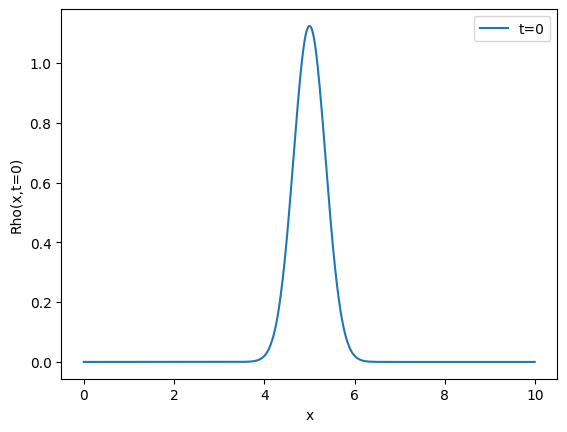

In [8]:
rho0_lambda = lambdify(x, rho0) # create a Python function out of the SymPy expression so the code runs faster
xvals = np.arange(0.0, L, 0.01)
plt.plot(xvals, rho0_lambda(xvals), label='t=0') # plot the probability density
plt.xlabel('x')
plt.ylabel('Rho(x,t=0)')
plt.legend()
plt.show()

(Code can be added here to plot the probability density as a function of time.)

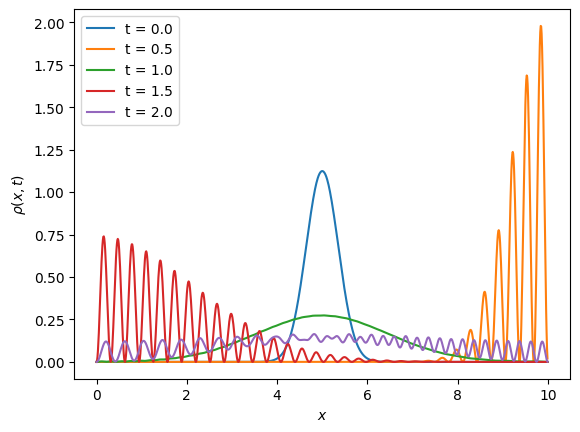

In [9]:
Tchange = np.linspace(0,2,5)
for tc in Tchange:
    td = exp(-1j*tc*En/HBAR)
    psit = Sum(c[n]*phi*td,(n,1,NSTATES))
    rhot = re(psit * conjugate(psit))
    tc = 't = ' + str(tc)
    rhot_lambda = lambdify(x, rhot) # create a Python function out of the SymPy expression so the code runs faster
    xvals = np.arange(0.0, L, 0.01)
    plt.plot(xvals, rhot_lambda(xvals), label=tc) # plot the probability density
plt.xlabel('$x$')
plt.ylabel(r'$\rho(x,t)$')
plt.legend(loc = 'upper left')
plt.show()

(Code can be added here for the rest of the problem as desired.)

In [10]:
#classic
Cp = HBAR*K #momentum
Cv = Cp/M #velocity
Ct = L/Cv #time
print('classic particle will take ' + str(Ct) + ' au')

classic particle will take 1.0 au


 <h2>Problem 3</h2>

The following code can be adapted to solve Problem 3 with SymPy. The symbols A-F, k, kappa, and L, are defined, and then the equations are solved with the SymPy "Solve" function. Note certain variables A-F will be set to 0 or 1 due to boundary conditions or arbitrary normalization.

In [15]:
A,B,C,D,E,F = symbols('A B C D E F')
k,kappa,L = symbols('k kappa L', constant = True, real = True)

The following is an example of how to solve a set of equations $A+B=1, A-B=3$. Note the equations are passed to SymPy as a list, where each entry is assumed to equal zero.

In [12]:
solve([A+B-1,A-B+3],set=True)

([A, B], {(-1, 2)})

In [13]:
#E<V
#at x=0
k = (2*M*En/HBAR**2)**.5
kmax = (2*M*En/HBAR**2)**.5
kappa = (kmax**2-k**2)**.5

PSIone0 = A + B
PSIonePr0 = -1j*k/L*A + 1j*k/L*B
PSItwo0 = C + D
PSItwoPr0 = -kappa/L*C + kappa/L*D
#at x = L
PSItwoL = C*exp(-kappa) + D*exp(kappa)
PSItwoPrL = -kappa/L*C*exp(-kappa) + kappa/L*D*exp(kappa)
PSOthreeL = E*exp(-1j*k) + F*exp(1j*k)
PSIthreePrL = -1j*k/L*E*exp(-1j*k) + 1j*k/L*F*exp(1j*k)
solve([PSIone0-PSItwo0,PSIonePr0-PSItwoPr0,PSItwoL-PSOthreeL,PSItwoPrL-PSIthreePrL,B-1,F,C-D],set=True)

([A, B, C, D, E, F, n],
 {(1.00000000000000,
   1.00000000000000,
   1.00000000000000,
   1.00000000000000,
   2.00000000000000,
   0.0,
   0.0),
  (E - 1.0, 1.00000000000000, 0.5*E, 0.5*E, E, 0.0, 0.0)})

In [16]:
#E>V
#at x=0
k = (2*M*En/HBAR**2)**.5
kmax = (2*M*En/HBAR**2)**.5
kappa = (k**2-kmax**2)**.5

PSIone0 = A + B
PSIonePr0 = -1j*k/L*A + 1j*k/L*B
PSItwo0 = C + D
PSItwoPr0 = -kappa/L*C + kappa/L*D
#at x = L
PSItwoL = C*exp(-kappa) + D*exp(kappa)
PSItwoPrL = -kappa/L*C*exp(-kappa) + kappa/L*D*exp(kappa)
PSOthreeL = E*exp(-1j*k) + F*exp(1j*k)
PSIthreePrL = -1j*k/L*E*exp(-1j*k) + 1j*k/L*F*exp(1j*k)
solve([PSIone0-PSItwo0,PSIonePr0-PSItwoPr0,PSItwoL-PSOthreeL,PSItwoPrL-PSIthreePrL,B-1,F,C-D],set=True)

([A, B, C, D, E, F, n],
 {(1.00000000000000,
   1.00000000000000,
   1.00000000000000,
   1.00000000000000,
   2.00000000000000,
   0.0,
   0.0),
  (E - 1.0, 1.00000000000000, 0.5*E, 0.5*E, E, 0.0, 0.0)})

In [17]:
#Part 1
k = (2*M*En/HBAR**2)**.5
kmax = (2*M*En/HBAR**2)**.5
kappa = (kmax**2-k**2)**.5


phione = A*1+B*1
phitwo = C*1
phioneprime = -1j*k*A*1+1j*k*B*1
phitwoprime = -kappa*C*1
solve([A+1-C,-1j*k*A+1j*k+kappa*C],set=True)

([A, C, n], {(1.00000000000000, 2.00000000000000, n), (C - 1.0, C, 0.0)})